***DATA WRANGLING***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
try:
    file_path = "/content/1730285881-Airbnb_Open_Data (1).xlsx"
    df = pd.read_excel(file_path)

    print("--- 1. DATA WRANGLING: ACCESS THE DATA ---")
    print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

except FileNotFoundError:
    print(f"FATAL ERROR: The file '{file_path}' was not found. Please check the file name and path.")
    # Exit script if data cannot be loaded
    import sys
    sys.exit()

--- 1. DATA WRANGLING: ACCESS THE DATA ---
Dataset loaded successfully with 102599 rows and 26 columns.

First 5 rows of the dataset:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon         

*ACCESS THE DATA*

In [8]:
print("\n--- PROBLEMS WITHIN THE DATA: CHECKING NULLS & TYPES ---")
print("Column data types and non-null counts:")
df.info()



--- PROBLEMS WITHIN THE DATA: CHECKING NULLS & TYPES ---
Column data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                     

In [9]:
print("\nMissing values (Null Count) per column (Top 10):")
print(df.isnull().sum().sort_values(ascending=False).head(10))



Missing values (Null Count) per column (Top 10):
license                           102597
house_rules                        54843
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            408
review rate number                   326
calculated host listings count       319
dtype: int64


In [10]:
print("\n--- CLEAN THE DATA: TRANSFORMATION ---")



--- CLEAN THE DATA: TRANSFORMATION ---


In [11]:
for col in ['price', 'service fee']:
    if col in df.columns:
        # Convert to string first to handle potential mixed types, then clean
        df[col] = df[col].astype(str).str.replace('[$,]', '', regex=True).astype(float)


In [12]:
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')


In [13]:
if 'reviews per month' in df.columns:
    df['reviews per month'].fillna(0, inplace=True)


/tmp/ipython-input-3052665633.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews per month'].fillna(0, inplace=True)


*CLEAN THE DATA*

In [14]:
df.dropna(subset=['NAME', 'host name'], inplace=True)


In [15]:
df.drop_duplicates(inplace=True)


In [16]:
print("Data cleaning complete. Updated data information:")
df.info()

Data cleaning complete. Updated data information:
<class 'pandas.core.frame.DataFrame'>
Index: 101388 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101388 non-null  int64         
 1   NAME                            101388 non-null  object        
 2   host id                         101388 non-null  int64         
 3   host_identity_verified          101112 non-null  object        
 4   host name                       101388 non-null  object        
 5   neighbourhood group             101362 non-null  object        
 6   neighbourhood                   101372 non-null  object        
 7   lat                             101380 non-null  float64       
 8   long                            101380 non-null  float64       
 9   country                         100862 non-null  object        
 10  country cod

***EXPLORATORY DATA ANALYSIS - EDA***

In [17]:
print("\n--- 2.1 EDA: GRAPHS AND DESCRIPTIVE STATISTICS ---")
print("Descriptive statistics for numerical columns:")
print(df.describe())


--- 2.1 EDA: GRAPHS AND DESCRIPTIVE STATISTICS ---
Descriptive statistics for numerical columns:
                 id       host id            lat           long  \
count  1.013880e+05  1.013880e+05  101380.000000  101380.000000   
mean   2.921061e+07  4.925888e+10      40.728079     -73.949664   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.507767e+07  2.458873e+10      40.688720     -73.982570   
50%    2.922911e+07  4.911887e+10      40.722310     -73.954440   
75%    4.328611e+07  7.399645e+10      40.762750     -73.932340   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   
std    1.626815e+07  2.853654e+10       0.055851       0.049470   

       instant_bookable  Construction year          price    service fee  \
count     101292.000000      101188.000000  101149.000000  101120.000000   
mean           0.497887        2012.486332     625.378303     125.043463   
min            0.000000        2003.000000      50.000000      10.0000

In [18]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

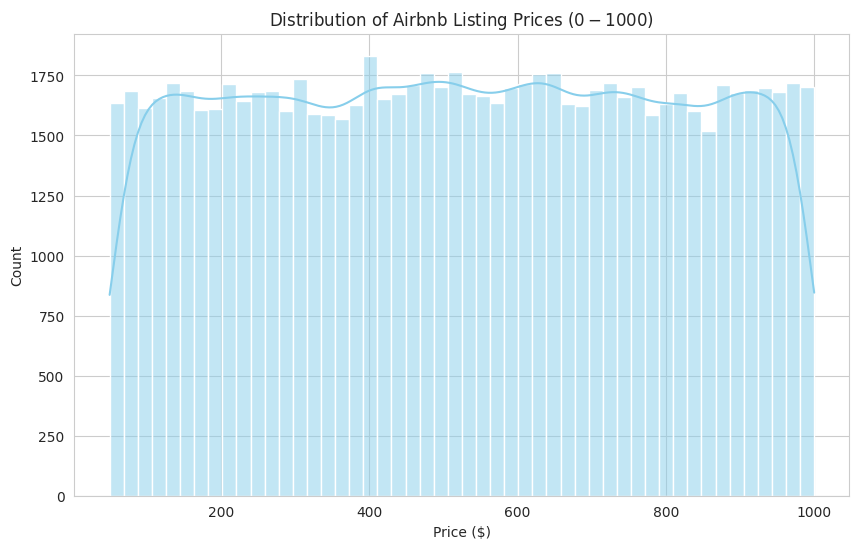

In [19]:
sns.histplot(df['price'][df['price'].between(0, 1000)], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Airbnb Listing Prices ($0 - $1000)')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

In [20]:
print("\n--- 2.2 EDA: NEIGHBOURHOODS ANALYSIS ---")


--- 2.2 EDA: NEIGHBOURHOODS ANALYSIS ---


/tmp/ipython-input-3209120685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighbourhood group', data=df, order=df['neighbourhood group'].value_counts().index, palette='crest')


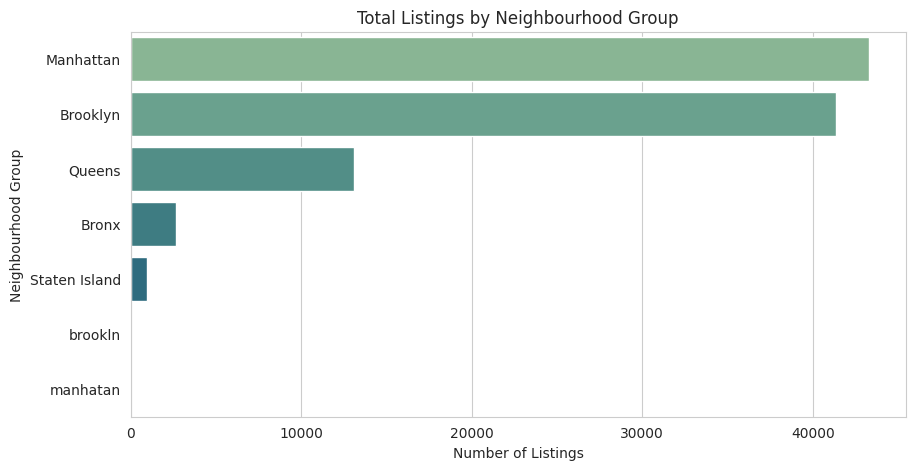

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(y='neighbourhood group', data=df, order=df['neighbourhood group'].value_counts().index, palette='crest')
plt.title('Total Listings by Neighbourhood Group')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood Group')
plt.show()


/tmp/ipython-input-1980347811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_group.index, y=avg_price_by_group.values, palette='viridis')


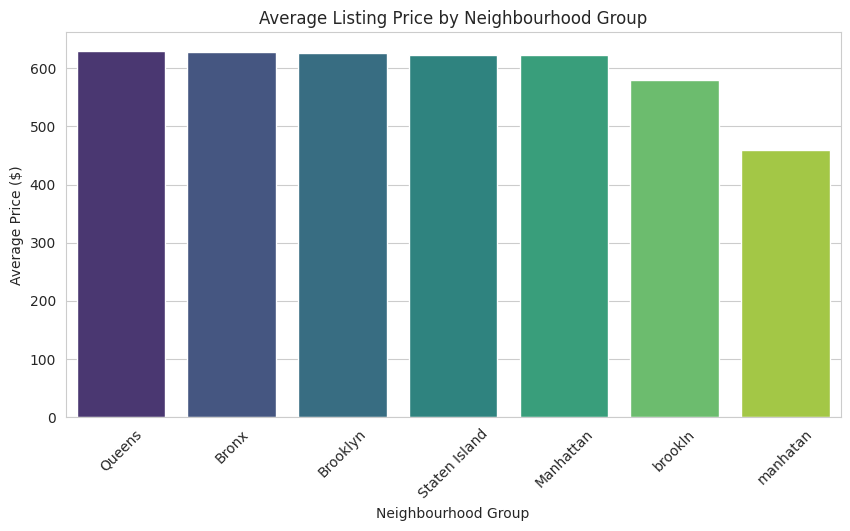

In [22]:
avg_price_by_group = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_group.index, y=avg_price_by_group.values, palette='viridis')
plt.title('Average Listing Price by Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

In [23]:
print("\n--- 2.3 EDA: HOSTS ANALYSIS ---")



--- 2.3 EDA: HOSTS ANALYSIS ---


In [24]:
top_hosts = df['host name'].value_counts().head(10)
print("Top 10 Hosts by Number of Listings:")
print(top_hosts)


Top 10 Hosts by Number of Listings:
host name
Michael         877
David           759
John            562
Alex            541
Sonder (NYC)    515
Daniel          468
Karen           436
Sarah           428
Maria           420
Anna            396
Name: count, dtype: int64


/tmp/ipython-input-2584427436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='magma')


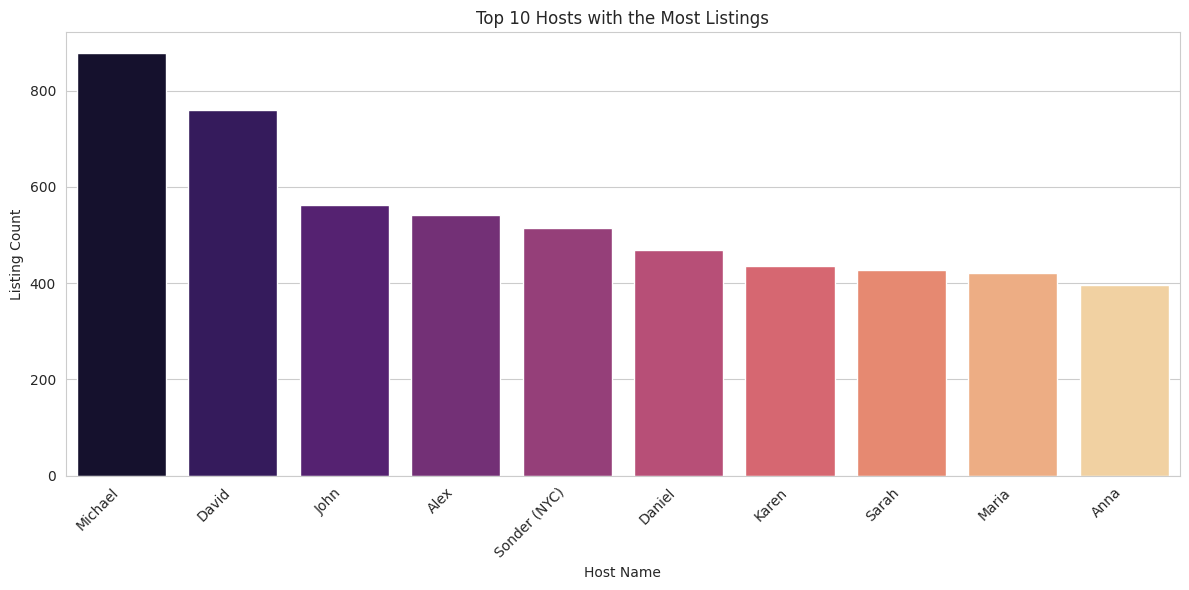

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='magma')
plt.title('Top 10 Hosts with the Most Listings')
plt.xlabel('Host Name')
plt.ylabel('Listing Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
print("\n--- 2.4 EDA: RELATIONS AND CORRELATIONS ---")


--- 2.4 EDA: RELATIONS AND CORRELATIONS ---


In [27]:
numerical_cols = ['price', 'minimum nights', 'number of reviews', 'reviews per month', 'calculated host listings count', 'availability 365']
corr_matrix = df[numerical_cols].corr()


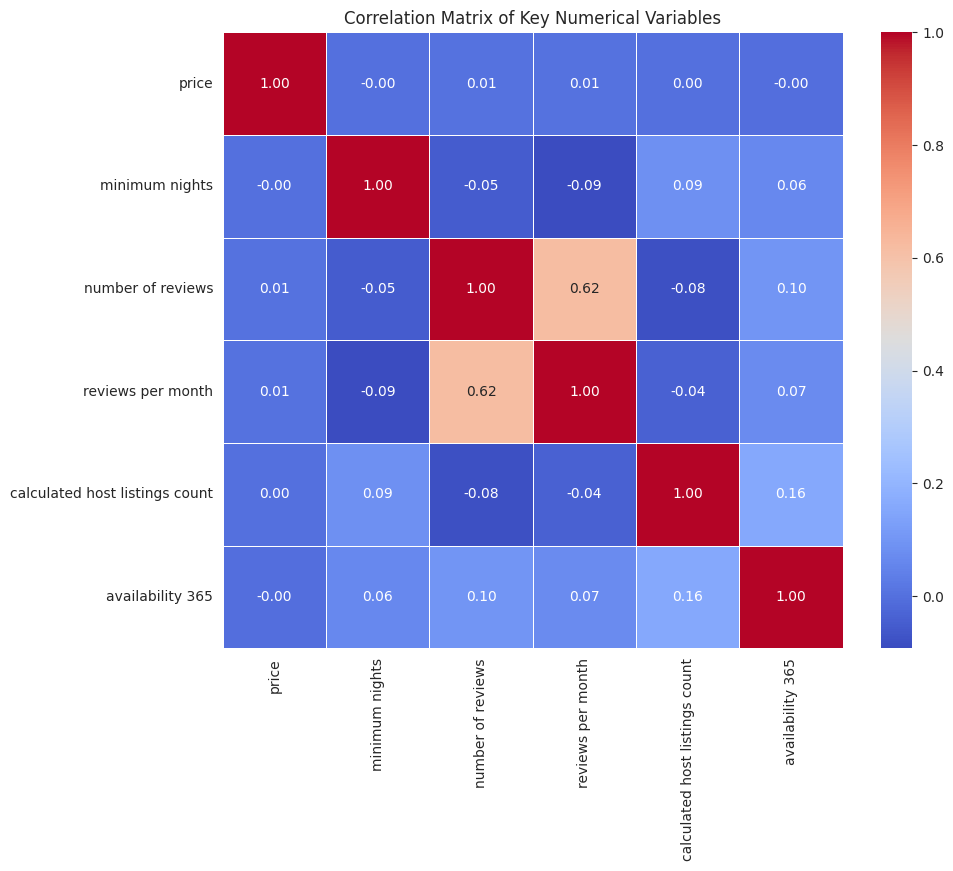

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Variables')
plt.show()

In [29]:
specific_correlation = df['calculated host listings count'].corr(df['availability 365'])
print("\nSpecific Correlation:")
print(f"df['calculated host listings count'].corr(df['availability 365'])")
print(f"Pearson Correlation Coefficient: {specific_correlation}")



Specific Correlation:
df['calculated host listings count'].corr(df['availability 365'])
Pearson Correlation Coefficient: 0.15884308755866242


In [30]:
df_filtered_scatter = df[df['price'].between(0, 500)] # Filter for typical price range


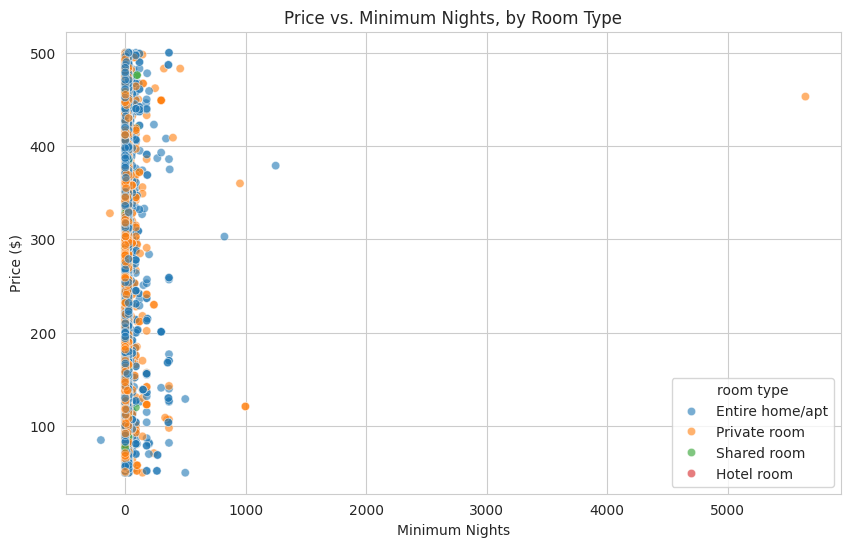

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum nights', y='price', hue='room type', data=df_filtered_scatter, alpha=0.6)
plt.title('Price vs. Minimum Nights, by Room Type')
plt.xlabel('Minimum Nights')
plt.ylabel('Price ($)')
plt.show()